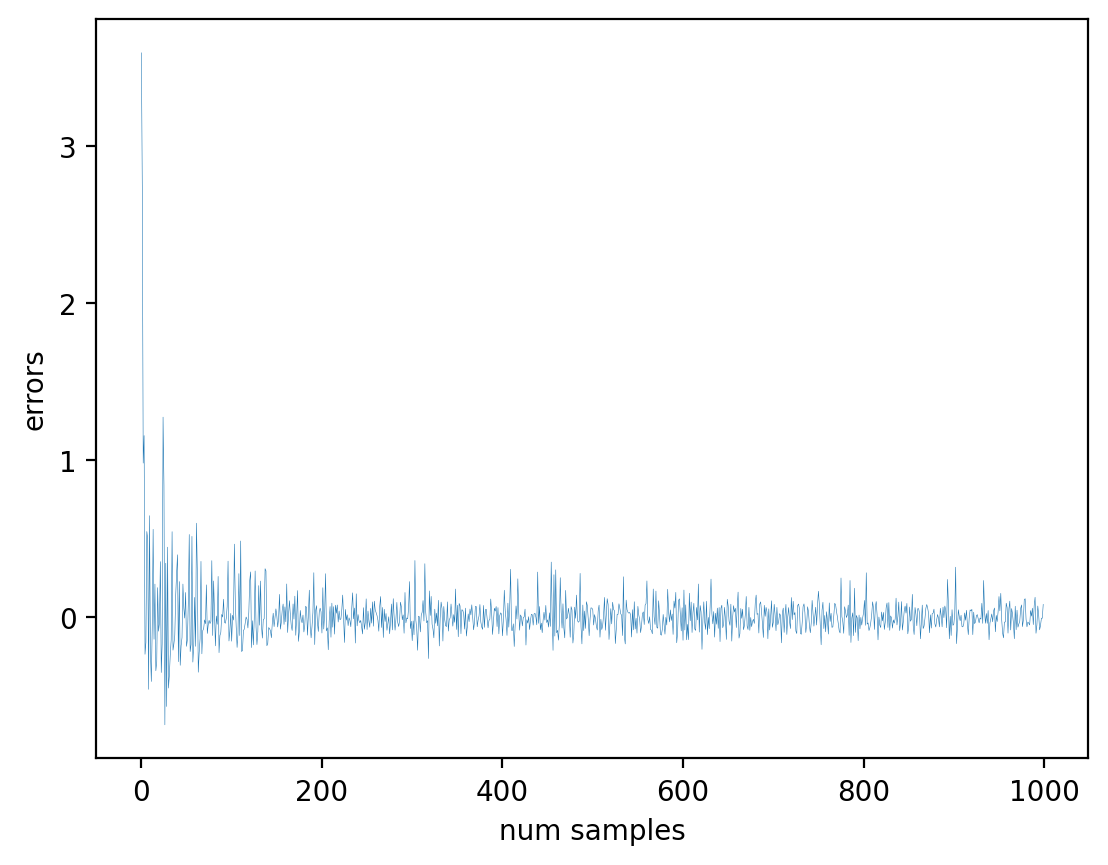

In [150]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

num_samp = 1000
num_neurons = 10
eta = 0.05
counter = 0
random_ints = np.random.uniform(-1, 1, num_samp)
bias = 1
# X is array of 2 by 1 vectors
X = [[[r], [bias]] for r in random_ints]


def feedforward(W, V, x):
    # [ n x m ][m x 1] = [n x 1] where m is 2
    activation_fn = np.matmul(W, x)
    decision_fn = np.tanh(activation_fn)
    y_hat = np.matmul(V, decision_fn)

    return (y_hat, activation_fn, decision_fn)


def y_actual(x):
    return 2 * (x[0][0] ** 2) + x[1][0]


def backpropagation(y_hat, act_fn, dec_fn, W, V, x):
    y_true = y_actual(x)
    error = y_true - y_hat

    V = V + eta * error * np.transpose(dec_fn)

    A = np.transpose(V) * (1 - dec_fn) * (1 + dec_fn)
    B = np.matmul(A, np.transpose(x))
    W = W + eta * error * B

    return (V, W, error[0][0])


def mlp_train(dataset, num_hidden_layer_neurons):
    W = np.random.choice([-1, 1], (num_hidden_layer_neurons, 2))
    V = np.random.choice([-1, 1], (1, num_hidden_layer_neurons))
    sse = 0
    counter = 0
    errors = []
    for x in X:
        y_hat, activation_fn, decision_fn = feedforward(W, V, x)

        V, W, e = backpropagation(y_hat, activation_fn, decision_fn, W, V, x)

        errors = [*errors, e]
        sse = sse + e**2
        counter = counter + 1
        mse = sse / counter

    plt.plot(errors, linewidth=0.2)
    plt.ylabel("errors")
    plt.xlabel("num samples")

    return W, V


W, V = mlp_train(X, num_neurons)

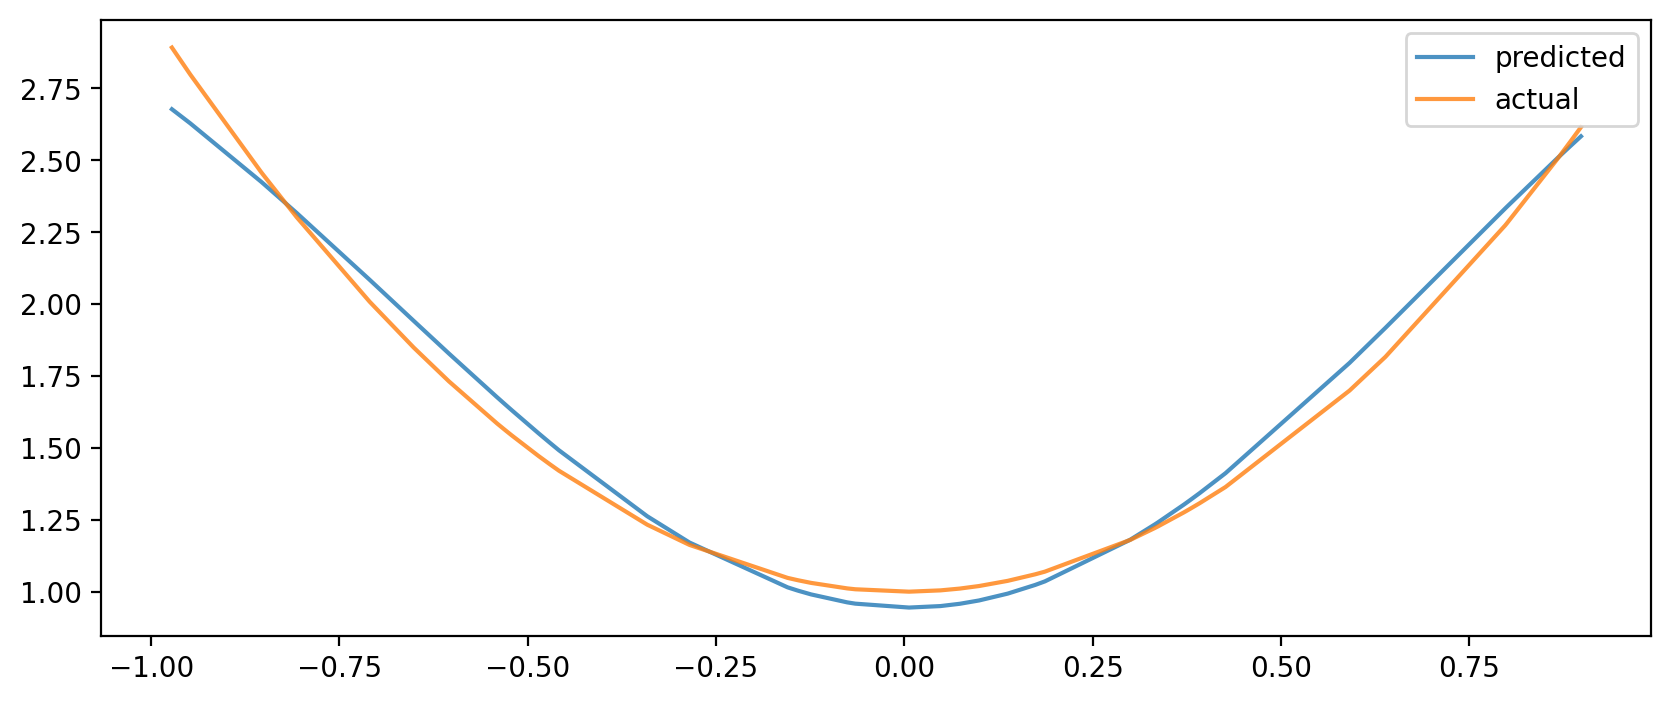

In [158]:
random_ints = np.random.uniform(-1, 1, 50)
X_test = [[[r], [bias]] for r in random_ints]

y_pred = []
for xx in X_test:
    y, _a, _b = feedforward(W, V, xx)
    y_pred = [*y_pred, y]

x_sorted, _y = zip(*sorted(zip(X_test, y_pred)))
rand_int_sorted, y_sorted = zip(*sorted(zip(random_ints, y_pred)))
y_sorted = [yy[0][0] for yy in y_sorted]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(rand_int_sorted, y_sorted, label="predicted", alpha=0.8)
ax.plot(rand_int_sorted, [y_actual(xx) for xx in x_sorted], label="actual", alpha=0.8)
ax.legend();

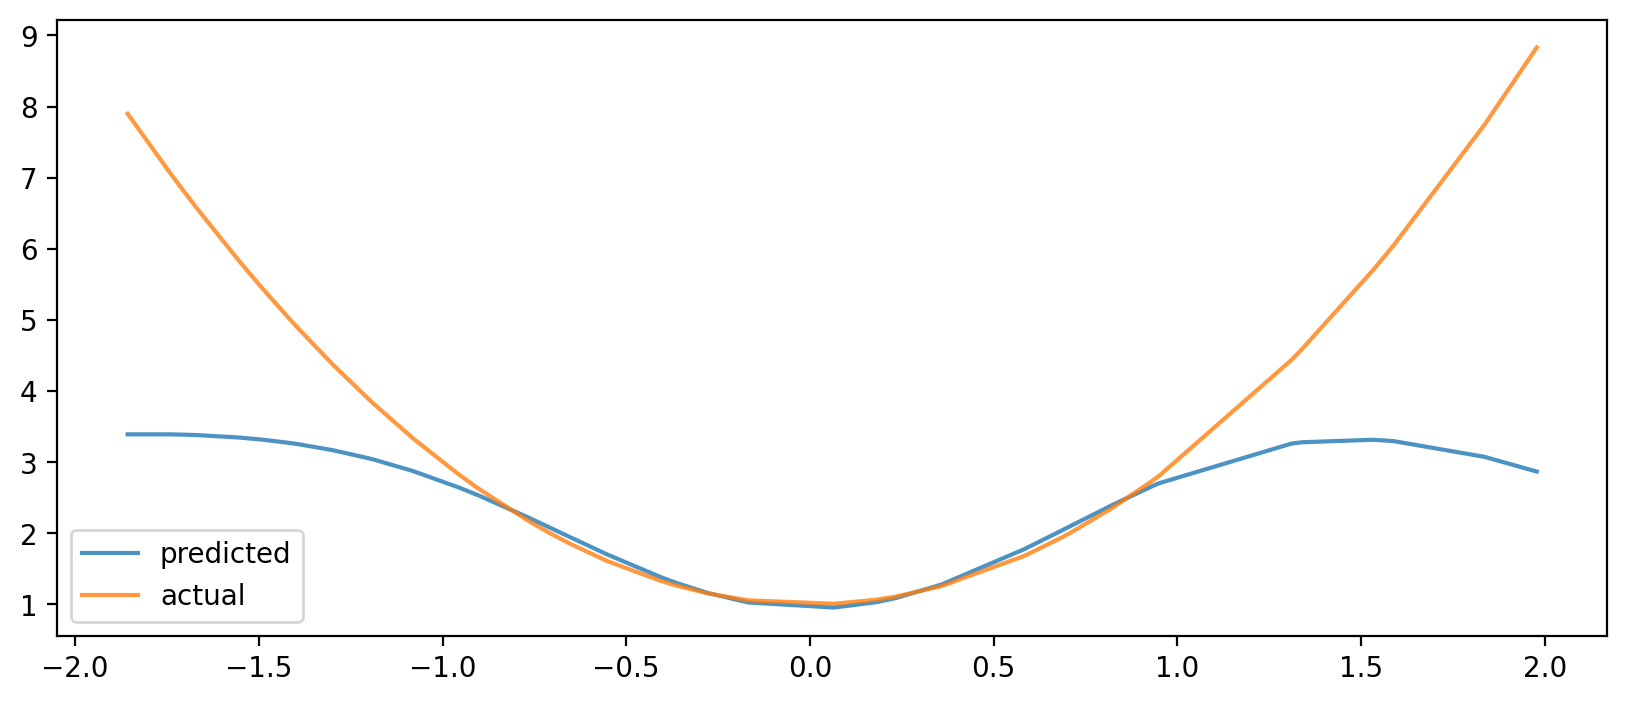

In [160]:
random_ints = np.random.uniform(-2, 2, 50)
X_test = [[[r], [bias]] for r in random_ints]

y_pred = []
for xx in X_test:
    y, _a, _b = feedforward(W, V, xx)
    y_pred = [*y_pred, y]

x_sorted, _y = zip(*sorted(zip(X_test, y_pred)))
rand_int_sorted, y_sorted = zip(*sorted(zip(random_ints, y_pred)))
y_sorted = [yy[0][0] for yy in y_sorted]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(rand_int_sorted, y_sorted, label="predicted", alpha=0.8)
ax.plot(rand_int_sorted, [y_actual(xx) for xx in x_sorted], label="actual", alpha=0.8)
ax.legend();